In [169]:
import pandas as pd
import seaborn as sns
import numpy as np

In [170]:
titleratings = pd.read_csv('titleratings.tsv', sep = '\t')
titleepisode = pd.read_csv('titleepisode.tsv', sep = '\t')
titlebasics = pd.read_csv('titlebasics.tsv', sep = '\t')

C:\Users\Wysteria\AppData\Local\Temp\ipykernel_11304\2425729778.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titlebasics = pd.read_csv('titlebasics.tsv', sep = '\t')


In [171]:
titleratings.head() 

,tconst,averageRating,numVotes
0,tt0000001,5.7,2014
1,tt0000002,5.7,270
2,tt0000003,6.5,1937
3,tt0000004,5.5,178
4,tt0000005,6.2,2712


In [172]:
titleepisode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [173]:
titlebasics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [174]:
rateepisodes = pd.merge(titleratings, titleepisode)
titleep = pd.merge(rateepisodes, titlebasics)

In [175]:
titleep.head()

,tconst,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0041951,7.6,87,tt0041038,1,9,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western
1,tt0042816,7.6,12,tt0989125,1,17,tvEpisode,Othello,Othello,0,1950,\N,135,Drama
2,tt0044093,4.5,18,tt0959862,1,6,tvEpisode,The Three Musketeers,The Three Musketeers,0,1950,\N,60,Drama
3,tt0045960,6.9,190,tt0044284,2,3,tvEpisode,King Lear,King Lear,0,1953,\N,75,"Drama,History,Music"
4,tt0046150,8.2,12,tt0341798,\N,\N,tvEpisode,Othello,Othello,0,1953,\N,84,Drama


In [176]:
titleep = titleep.drop(['parentTconst', 'titleType', 'primaryTitle', 'isAdult', 'endYear', 'tconst'], axis = 1)

In [177]:
titleep.replace("\\N", np.nan, inplace = True)

In [178]:
titleep.head()

,averageRating,numVotes,seasonNumber,episodeNumber,originalTitle,startYear,runtimeMinutes,genres
0,7.6,87,1,9,The Tenderfeet,1949,30,Western
1,7.6,12,1,17,Othello,1950,135,Drama
2,4.5,18,1,6,The Three Musketeers,1950,60,Drama
3,6.9,190,2,3,King Lear,1953,75,"Drama,History,Music"
4,8.2,12,NaN,NaN,Othello,1953,84,Drama


In [179]:
titleep = titleep.dropna()

In [180]:
epiratings = titleep.drop(['numVotes','seasonNumber','originalTitle','startYear','runtimeMinutes','genres'], axis = 1)

In [195]:
epiratings = epirating.drop(episodeNumber > 100)

NameError: name 'epirating' is not defined

TypeError: 'tuple' object is not callable

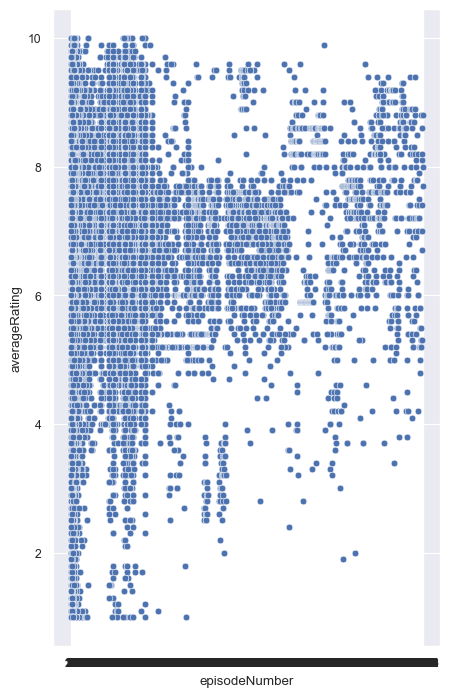

In [194]:
sns.scatterplot(data=epiratings,x='episodeNumber',y='averageRating')
plt.xlim(right=100)